In [1]:
from db import Account

2023-09-17 18:26:35,192 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-09-17 18:26:35,198 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("tenant")
2023-09-17 18:26:35,209 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-17 18:26:35,216 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("landlord")
2023-09-17 18:26:35,218 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-17 18:26:35,229 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("housetype")
2023-09-17 18:26:35,233 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-17 18:26:35,242 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("room")
2023-09-17 18:26:35,247 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-17 18:26:35,256 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("account")
2023-09-17 18:26:35,260 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-09-17 18:26:35,265 INFO sqlalchemy.engine.Engine COMMIT


In [2]:
Account

db.Account

In [3]:
from server import db

In [4]:
acc = Account(firstname='Bernice', secondname="Ong'ayo", username='admin', email='ambundothesecond@gmail.com', password='boaboa')


In [5]:
db.session.add(acc)

In [6]:
db.session.commit()

In [7]:
import requests

In [8]:
resp = requests.get('http://127.0.0.1:5000/login')
resp.content

b'Not sure what happend'

In [9]:
url = 'http://127.0.0.1:5000/create_account'
data = {
    'firstname':'Monica',
    'secondname':'Mbugua',
    'email':'monicambugua@gmail.com',
    'username':'mbugush',
    'password':'monicas',
    'image':'D:/files/images/IMG-20220313-WA0011.jpg'
}
resp = requests.post(url, data=data)
resp.content

b'<!doctype html>\n<html lang=en>\n  <head>\n    <title>flask.debughelpers.DebugFilesKeyError: You tried to access the file \'image\' in the request.files dictionary but it does not exist. The mimetype for the request is \'application/x-www-form-urlencoded\' instead of \'multipart/form-data\' which means that no file contents were transmitted. To fix this error you should provide enctype="multipart/form-data" in your form.\n\nThe browser instead transmitted some file names. This was submitted: \'D:/files/images/IMG-20220313-WA0011.jpg\'\n // Werkzeug Debugger</title>\n    <link rel="stylesheet" href="?__debugger__=yes&amp;cmd=resource&amp;f=style.css">\n    <link rel="shortcut icon"\n        href="?__debugger__=yes&amp;cmd=resource&amp;f=console.png">\n    <script src="?__debugger__=yes&amp;cmd=resource&amp;f=debugger.js"></script>\n    <script>\n      var CONSOLE_MODE = false,\n          EVALEX = true,\n          EVALEX_TRUSTED = false,\n          SECRET = "uOeIP3fUyaeB6YRZce4r";\n   

In [10]:
url = 'http://127.0.0.1:5000/check_username'
data = {'username':'admin'}
resp = requests.post(url, data=data)
if 'Invalid' in str(resp.content):
    print('in use ')
else:
    print('Not in use')

in use 


In [17]:
url = 'http://127.0.0.1:5000/upload'
data = {'file':('monica.jpg', open('D:/files/images/IMG-20220313-WA0011.jpg', 'rb'))}
resp = requests.post(url, files=data)
resp

<Response [200]>

In [12]:
url = 'http://127.0.0.1:5000/files'
data = {'username':'admin'}
resp = requests.get(url)



In [85]:
from PIL import Image
from io import BytesIO
from matplotlib import pyplot as plt
import base64

In [49]:
image = Image.open(BytesIO(resp.content))


In [52]:
type(resp.content)

bytes

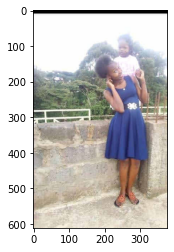

In [50]:
plt.imshow(image)

In [106]:
resp.headers

{'Server': 'Werkzeug/2.1.2 Python/3.10.5', 'Date': 'Sun, 17 Sep 2023 15:28:13 GMT, Sun, 17 Sep 2023 15:28:13 GMT', 'Content-Disposition': 'inline; filename=monica.jpg', 'Content-Type': 'image/jpeg', 'Content-Length': '29210', 'Last-Modified': 'Sun, 17 Sep 2023 15:28:11 GMT', 'Cache-Control': 'no-cache', 'Connection': 'close'}

In [19]:
from flask import send_from_directory

In [20]:
url = 'http://127.0.0.1:5000/house'
data = {'housetype':'Bungalow',
				'location_description':'The house is  next to the Museum Arcade and close to the parliament building',
				'floorspace': 13,
				'name':'The masters',
				'region':'Nairobi',
				'location':'West Lands',
                'rooms':12,
				'water':True,
				'rent':20000,
				'gps':'23.34434, 26.784'}
files = {'picture':('monica.jpg', open('D:/files/images/IMG-20220313-WA0011.jpg', 'rb'))}
resp = requests.post(url, data=data, files=files)
resp

<Response [200]>

In [21]:
url ='http://127.0.0.1:5000/room'
data =  {
				'hotelname':'serena',
				'region':'Nairobi',
				'roomtype':'luxury',
				'gps':'84.737348,72.8734423',
				'amount':82382,
				'location':'Opposite luxury casino',
				'description':'The room is furnished with a lot of content and the place is very secure'
		}
files = {'picture':('monica.jpg', open('D:/files/images/IMG-20220313-WA0011.jpg', 'rb'))}
resp = requests.post(url, data=data, files=files)
resp

<Response [200]>

In [22]:
url ='http://127.0.0.1:5000/uploads/monica.jpg'
resp =  requests.get(url)
resp

<Response [200]>

In [23]:
resp.headers

{'Server': 'Werkzeug/2.1.2 Python/3.10.5', 'Date': 'Sun, 17 Sep 2023 15:28:13 GMT, Sun, 17 Sep 2023 15:28:13 GMT', 'Content-Disposition': 'inline; filename=monica.jpg', 'Content-Type': 'image/jpeg', 'Content-Length': '29210', 'Last-Modified': 'Sun, 17 Sep 2023 15:28:11 GMT', 'Cache-Control': 'no-cache', 'Connection': 'close'}

In [117]:
r = requests.get('http://localhost:5000/get_images')

In [118]:
r

<Response [200]>

In [119]:
result = r.json()

In [ ]:
for img in result['images']:
    i = img.replace('/', '_')
    file = i.replace('\\','_')
    print(file)
    r = requests.get(f'http://localhost:5000/get_file/{file}')
    print(r.text)
    

D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220312-WA0002.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x03\xc0\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x001\x00\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x01\x02\x04\x05\x06\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xe0\xbb3lnz*\x19\xa7\x0br\xef7\x95\xd4\xe5s\xa3\xa4\xac9Z\xe9\xaaR\xb2K\x96\xfa2\xf4N-\xf8\xba\xcc\xe9\xb4nDZ\xbb\x8106\x84D\x00M\xaa\xd2\xb5`P$\x8b,&\x96\xa

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220402-WA0001.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x05\xf0\x02\xd0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x002\x00\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x01\x02\x03\x06\x07\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xf5@\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220402-WA0002.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x03\xd9\x02\xd0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x01\x00\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x05\x06\x02\x03\x04\x07\x08\xff\xc4\x00a\x10\x00\x01\x04\x02\x00\x04\x03\x03\x07\x06\x04\x11\x08\x08\x04\x07\x01\x00\x02\x03\x04\x05\x11\x06\x12!1\x13AQ\x14"a\x07\x152q\x81\x91\xd1\x16#BR\x93\xa1T\x92\x94\xb1\x17$%345DSUbrs\x82\xc1\xd2\xd3\xd4CEct\x83\xb2\xe1\xf0du\x84\x95\xa2\xa3\xa4\xb3\x08&FV\xf1\x186\x85\xc4\xe2\xe4\xff\xc4\x00\x1a\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220404-WA0009.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x03\xe8\x01\xc2\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x003\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x01\x02\x04\x05\x06\x07\x01\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xe1\x01\xac\x00\x00\x00\x00\x04\x90\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x06\xa3)0\x

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220405-WA0004.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x0b\x08\x08\n\x08\x07\x0b\n\t\n\r\x0c\x0b\r\x11\x1c\x12\x11\x0f\x0f\x11"\x19\x1a\x14\x1c)$+*($\'\'-2@7-0=0\'\'8L9=CEHIH+6OUNFT@GHE\xff\xdb\x00C\x01\x0c\r\r\x11\x0f\x11!\x12\x12!E.\'.EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEE\xff\xc2\x00\x11\x08\x05X\x048\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x01\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x05\x06\x02\x04\x07\x03\x01\x08\xff\xc4\x00\x1a\x01\x01\x00\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x04\x02\x03\x06\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x00\xeb\x87\xc3\xea%\x96\xd9dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89dH\x96D\x89

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220406-WA0004.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x02\x00\x02\x00\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x001\x00\x00\x01\x05\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xd2\x02\x94\x16\x10P\x00\x00Q\x05\x04\x00\x05 \x02\x80\x05TX\x00\x10R\x10R\x90P\x00\x00\x00\x00\x14\x10\x16\x11E\xa4\x05\x10R\x80!\x05\x04\

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220406-WA0008.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x03\xe8\x03\x19\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x000\x00\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x02\x05\x06\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xf9\xa9\xfa\xae\xb5>Q\xf5\x83\xe4\xe3\xebG\xc8\xbe\xb8|\x83\xeb\x87\xc8\xc7\xd7\xc1\xf2/\xaf\x1f \xfa\xe8\x8f\x92}p\xf9\x17\xd7+\xe4g\xeb\x87\x

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220407-WA0000.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x04\x0e\x02`\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x00\x07\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x04\x05\x06\x07\x01\x08\xff\xc4\x00a\x10\x00\x01\x03\x03\x03\x01\x05\x05\x04\x04\x07\t\x0c\x08\x02\x0b\x01\x02\x03\x04\x00\x05\x11\x06\x12!1\x07\x13"AQ\x142aq\x91\x15R\x81\xa1#B\xb1\xd1\x163Sbr\xc1\xf0\x08\x17$\x82\x92\x93\xb2\xd2\xe1%46CVcs\x83\x94\xa2\xc2\xf1\'57DUtu\xb3&T\xa3\x18(8EFd\x84\x95\xc3e\xff\xc4\x00\x19\x01\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220407-WA0001.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x04\x84\x03c\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x000\x00\x01\x01\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x05\x02\x06\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xf9Q\x01`@\x16\x14\xedq~\x92\xde\x8f7ca4o[\xc2\xf3\x1d\x14h{\xd8\xc7Ox0\x9d\x076\x1di\xc6\xb1\xd8q\xb3\'J\xf2\xf3\x9b\xad|\xa7\xab*\x80\x08\x00\x0

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220407-WA0004.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x04\xb0\x06@\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x003\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x01\x02\x05\x00\x06\x07\x01\x00\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xcf\t\x81\x94\xef+\x9fY\x04&"\xd3BSM\xdev\xa0\x12\x1e\xaaJi\x89\x08i\x99\x91\x12^O\xcdz\x0c\x0fB\x9bX\xbb\xcbb \x8f\xaaOc\xca\xe8\xa5\

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220408-WA0002.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\x01\x06\x06\x06\x06\x07\x06\x07\x08\x08\x07\n\x0b\n\x0b\n\x0f\x0e\x0c\x0c\x0e\x0f\x16\x10\x11\x10\x11\x10\x16"\x15\x19\x15\x15\x19\x15"\x1e$\x1e\x1c\x1e$\x1e6*&&*6>424>LDDL_Z_||\xa7\xff\xc2\x00\x11\x08\x03\xc0\x02\xf7\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00.\x00\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x03\x04\x02\x05\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x02\xf9c\x86\xba{\xf9:\xfag\xc4\xadYB(\x00\x04\xf4"\x80\x00YE\x04\xa2(\x80\x02\x01\x00\x05\x94\xa5\x80\xa9,"\xa0\x01H\xa2T)\x0b,\x16R\xcb\x00\x00@R\xa0\x16

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220411-WA0001.jpg
b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xdb\x00C\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\xff\xc0\x00\x11\x08\x00\x9b\x01\xab\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x02\x02\x02\x02\x03\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\t\x08\n\x06\x07\x05\x0b\x02\x03\x04\x01\xff\xc4\x00U\x10\x00\x02\x01\x03\x03\x03\x02\x03\x04\x04\x0b\x03\x07\x07\r\x00\x01\x02\x03\x04\x05\x06

b'File Not Found'
D:_GDWhatsApp_Media_GBWhatsApp Images_IMG-20220412-WA0003.jpg


In [97]:
base64.b64decode(result['result'][0])

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xc0\x00\x00\x03\xc0\x08\x02\x00\x00\x00u\xb4\x87\xcc\x00\x01\x00\x00IDATx\x9c\xd4\xfd\xcb\x92+9\xb2%\n\xae\xa5\n\xa3\xfb\x8e\xccsK\xaa\xc6=\xe9Q\xff\xff\x8f\xb5\xc8\xbdR\'c\x93\x06\xd5\xd5\x03\x05` \xe9\xbe#"3OU5r\'\x83n\xb4\x07\x0cP(\x96\xbe\xf9\xff\xfa\x7f\xff\x7f$\x010\xb3\xd6\xdaq\x1c\xc7q\xb8\xfb\xc7\xc7aff\x04S\x92\x14\xa4H\x12h\xad\xb9\xbb\x99\xb9\xbb\xbbG\xc4\xe3\xf1x<\x1e\xbd\xf7\xc7\xe3q\xbf\xdf\xcf\xf3\x8c\x08I@\x9e?\xef\xa0\x00H\xe2h"\x05\xe0\xb8\xd9\xc7\xc7\xc7\x8f\xdf\x8e\xcf\xcf\xcf\xdf~\xfb\xfc\xf1\xe3\xf3\xb8\xf9\xdf\xff\xf6\xf1\xf1\xd9>??o7\xfb\xfc\xfc\xfc\xfcq\xb8\xbbpJ\x91:3{\xea\x91\x99\xbd\x9f\x8f\xc7\xcf\x1e\x8f\xff\xfc\xcf\xff\xec\xfd\xd1{\xef\xbdg\x86$H\x99\x99\xa1\x88\xe8={\xefyfD\x9cgD\x04\xd33\xd3\x04\x92\xa9.\xe98\xda\xc7\xa7\x7f\x1c\xb7\xe3f\x9f\x9f\xb7\xdb\x87\xb5\xd6\xbc\xa1\x99\x932\x1e\xf5\xa6\xad\xb5\xdb\xedv\xbb\xdd>\xda\x87\x99\x99\xb5\xf3<\xef?\xe3~\xbf\xdf\x7f?\xef\xf7\xfb\xfd~\x9e\x8f\xc8T\xefy>\x

In [99]:
for pos, i in enumerate(result['result']):
    img = Image.open(BytesIO(base64.b64decode(i)))
    img.save(f'file-{pos}.png')

In [144]:
import os
string = 'D:/GDWhatsApp/Media/GBWhatsApp Images/IMG-20220414-WA0004/remove/bg.png'
if 'remove' in string:
    s = string.split('/')
    temp = ''
    print(s[-2:])
    v = s[-2:]
    f = v[0] +'_'+ v[1]
    for i in s[:-2]:
        k = i + '/'
        temp+=  k
        
    print(os.path.join(temp, f))
    

['remove', 'bg.png']
D:/GDWhatsApp/Media/GBWhatsApp Images/IMG-20220414-WA0004/remove_bg.png


In [155]:
filename = string.split('/')[-1:][0]

In [156]:
filename

'bg.png'